In [1]:
from db_utils import loading_data

loan_payments_df = loading_data()

In [2]:
loan_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

In [3]:
loan_payments_df.head(5)

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


In [3]:
original_df = loan_payments_df.copy()

In [4]:
from data_transform import DataTransform

transformer = DataTransform(loan_payments_df)
transformed_df = transformer.transform()

In [4]:
transformed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           54231 non-null  string        
 1   member_id                    54231 non-null  string        
 2   loan_amount                  54231 non-null  int64         
 3   funded_amount                51224 non-null  float64       
 4   funded_amount_inv            54231 non-null  float64       
 5   term                         49459 non-null  category      
 6   int_rate                     49062 non-null  float64       
 7   instalment                   54231 non-null  float64       
 8   grade                        54231 non-null  category      
 9   sub_grade                    54231 non-null  category      
 10  employment_length            52113 non-null  category      
 11  home_ownership               54231 non-nu

In [5]:
from data_frame_info import DataFrameInfo

info = DataFrameInfo(transformed_df)

In [6]:
info.null_value_count(as_percentage=True)

id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
open_accounts   

In [6]:
for_visual_plot_df = transformed_df.copy()

In [7]:
from data_frame_transform import DataFrameTransform

df_transform = DataFrameTransform(transformed_df, threshold=0.1)

In [8]:
df_transform.drop_high_null_columns()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,512.21,0.000000,0.00,0.00,2022-01-01,248.82,2022-01-01,0.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,787.94,0.000000,0.00,0.00,2022-01-01,407.52,2022-01-01,0.0,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,824.54,0.000000,0.00,0.00,2021-10-01,12850.16,2021-10-01,0.0,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,947.47,0.000000,0.00,0.00,2021-06-01,13899.67,2021-06-01,0.0,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,770.93,0.000000,0.00,0.00,2022-01-01,456.54,2022-01-01,0.0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,724.82,0.000000,0.00,0.00,2016-07-01,160.61,2016-07-01,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,826.31,104.942381,0.00,0.00,2016-10-01,490.01,2016-09-01,0.0,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,415.37,0.000000,0.00,0.00,2016-09-01,110.58,2013-05-01,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,174.18,0.000000,0.00,0.00,2014-03-01,0.00,2013-05-01,NaN,1,INDIVIDUAL


In [9]:
imputed_df = df_transform.impute_missing_values()

In [10]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          54231 non-null  string        
 1   member_id                   54231 non-null  string        
 2   loan_amount                 54231 non-null  int64         
 3   funded_amount               54231 non-null  float64       
 4   funded_amount_inv           54231 non-null  float64       
 5   term                        54231 non-null  category      
 6   int_rate                    54231 non-null  float64       
 7   instalment                  54231 non-null  float64       
 8   grade                       54231 non-null  category      
 9   sub_grade                   54231 non-null  category      
 10  employment_length           54231 non-null  category      
 11  home_ownership              54231 non-null  category  

In [12]:
info.null_value_count(as_percentage=True)

id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term                          0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0
total_rec_prncp               0.0
total_rec_int 

In [11]:
analysis_df = imputed_df.copy()

In [12]:
from plotter import Plotter

visualise = Plotter(imputed_df)

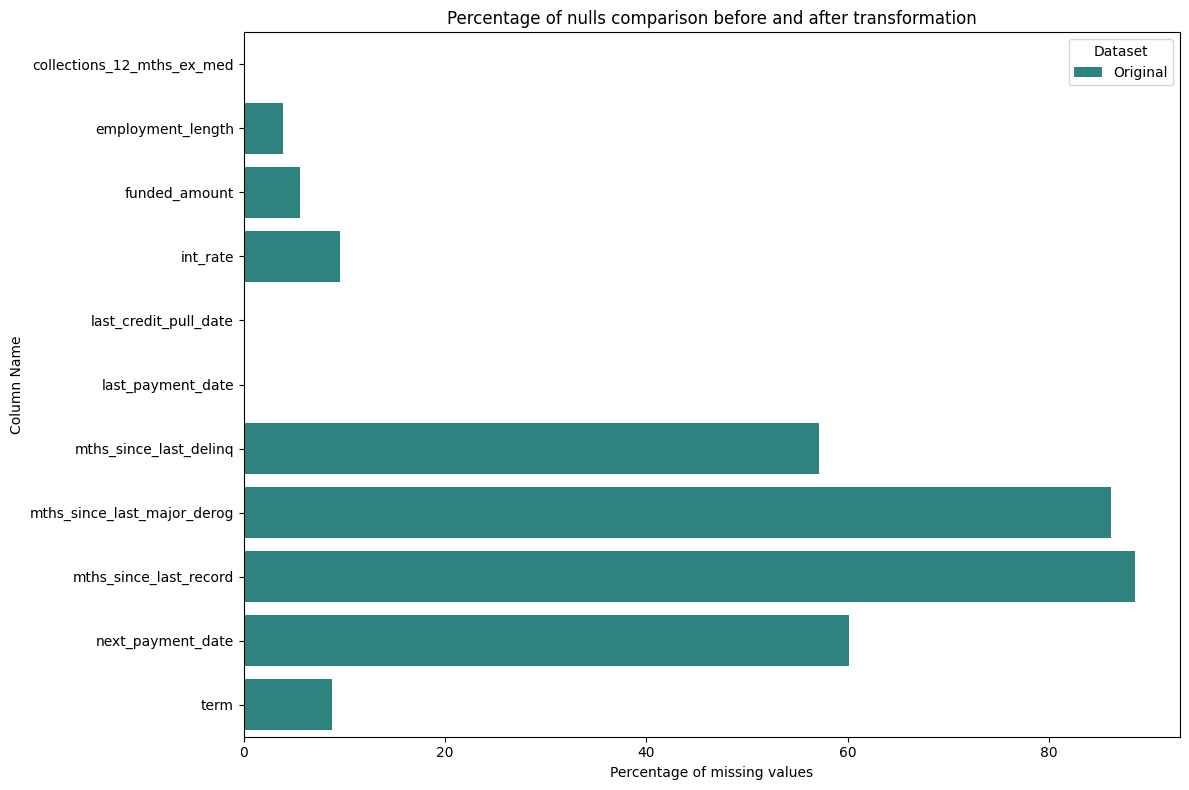

In [17]:
#To visualise all columns before any columns are dropped from DataFrame
visualise.removal_of_null_visualised(original_df)

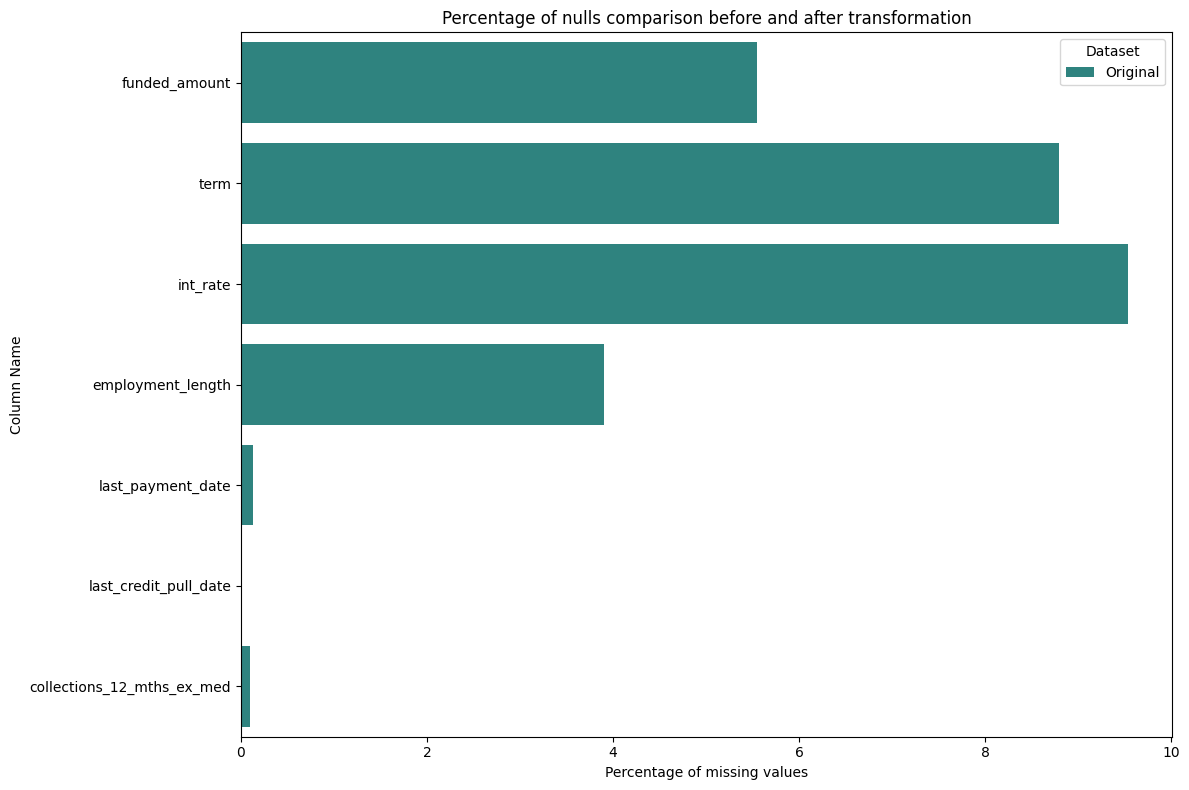

In [18]:
#To visualise columns that have not been dropped but needed data imputed
visual_transform = DataFrameTransform(for_visual_plot_df, threshold=0.2)
visual_transform.drop_high_null_columns()
visual = Plotter(imputed_df)
visual.removal_of_null_visualised(for_visual_plot_df)

In [13]:
from skewed_data import SkewedData

analysis = SkewedData(analysis_df)

In [ ]:
analysis = DataFrameInfo(analysis_df)

In [14]:
skewed_columns = analysis.skew_check(threshold=1)

In [15]:
vis_analysis = Plotter(analysis_df)

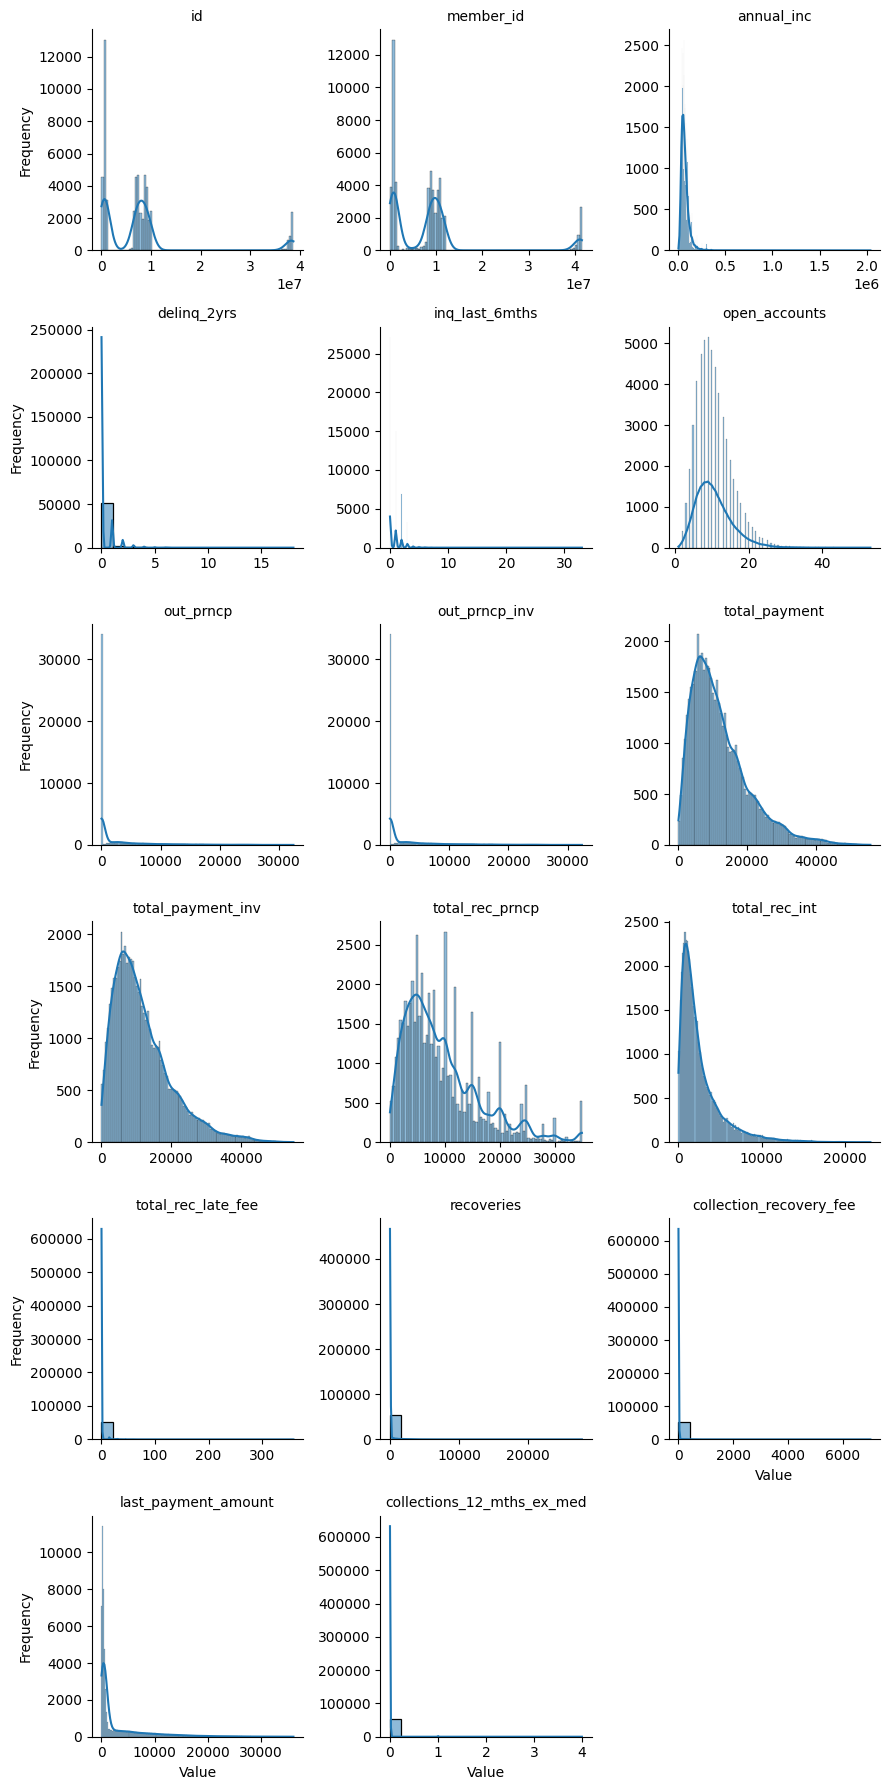

In [22]:
vis_analysis.skew_plotted(skewed_columns)

In [16]:
transform_skew = DataFrameTransform(analysis_df)

In [17]:
skewed_df = transform_skew.transform_skewed_columns(skewed_columns)

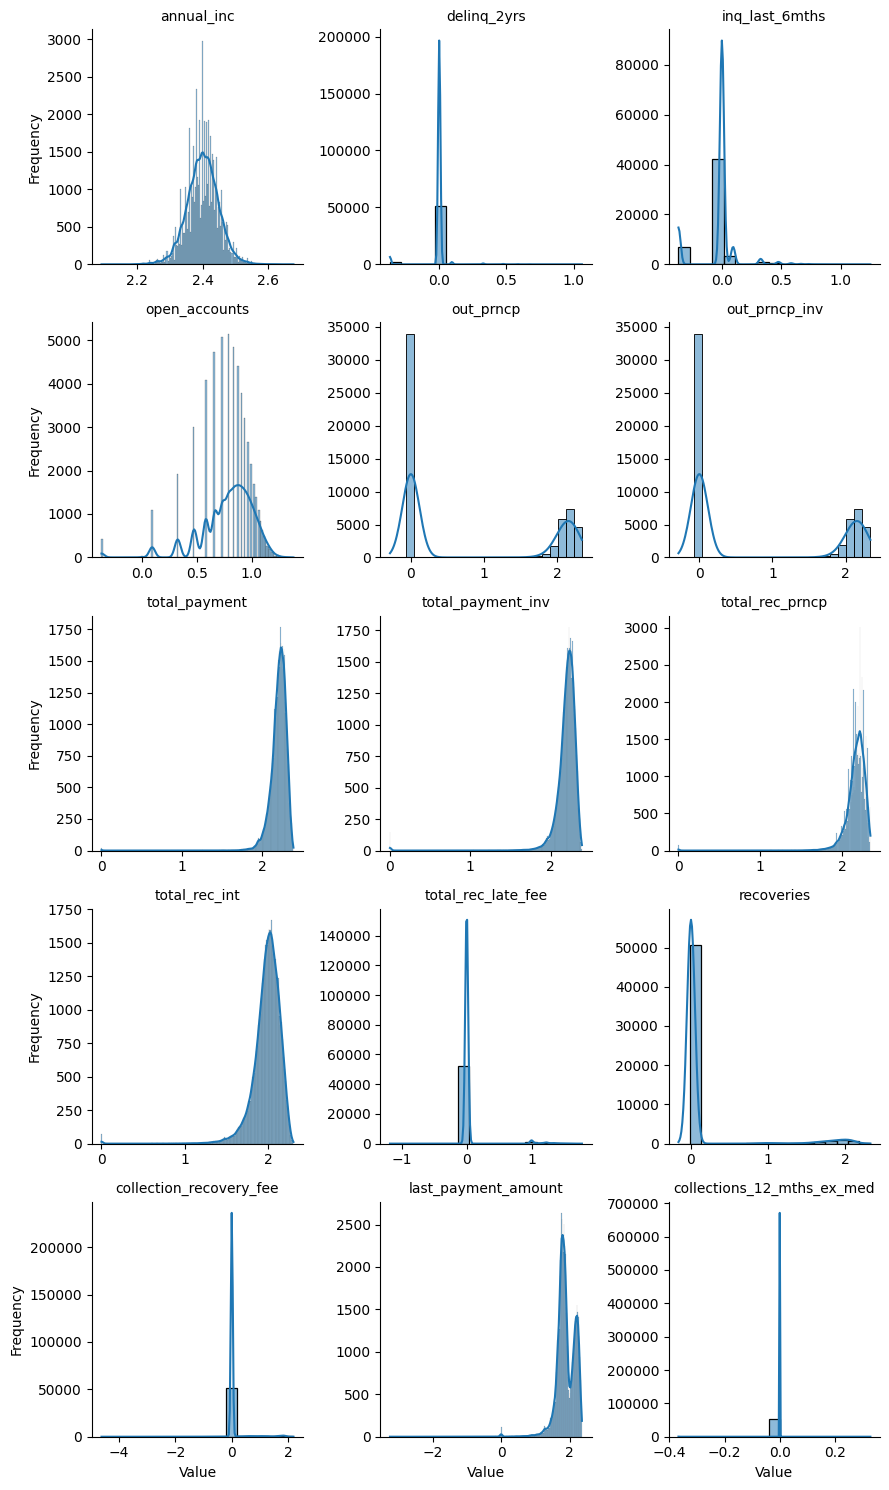

In [20]:
vis_analysis.skew_plotted(skewed_columns)

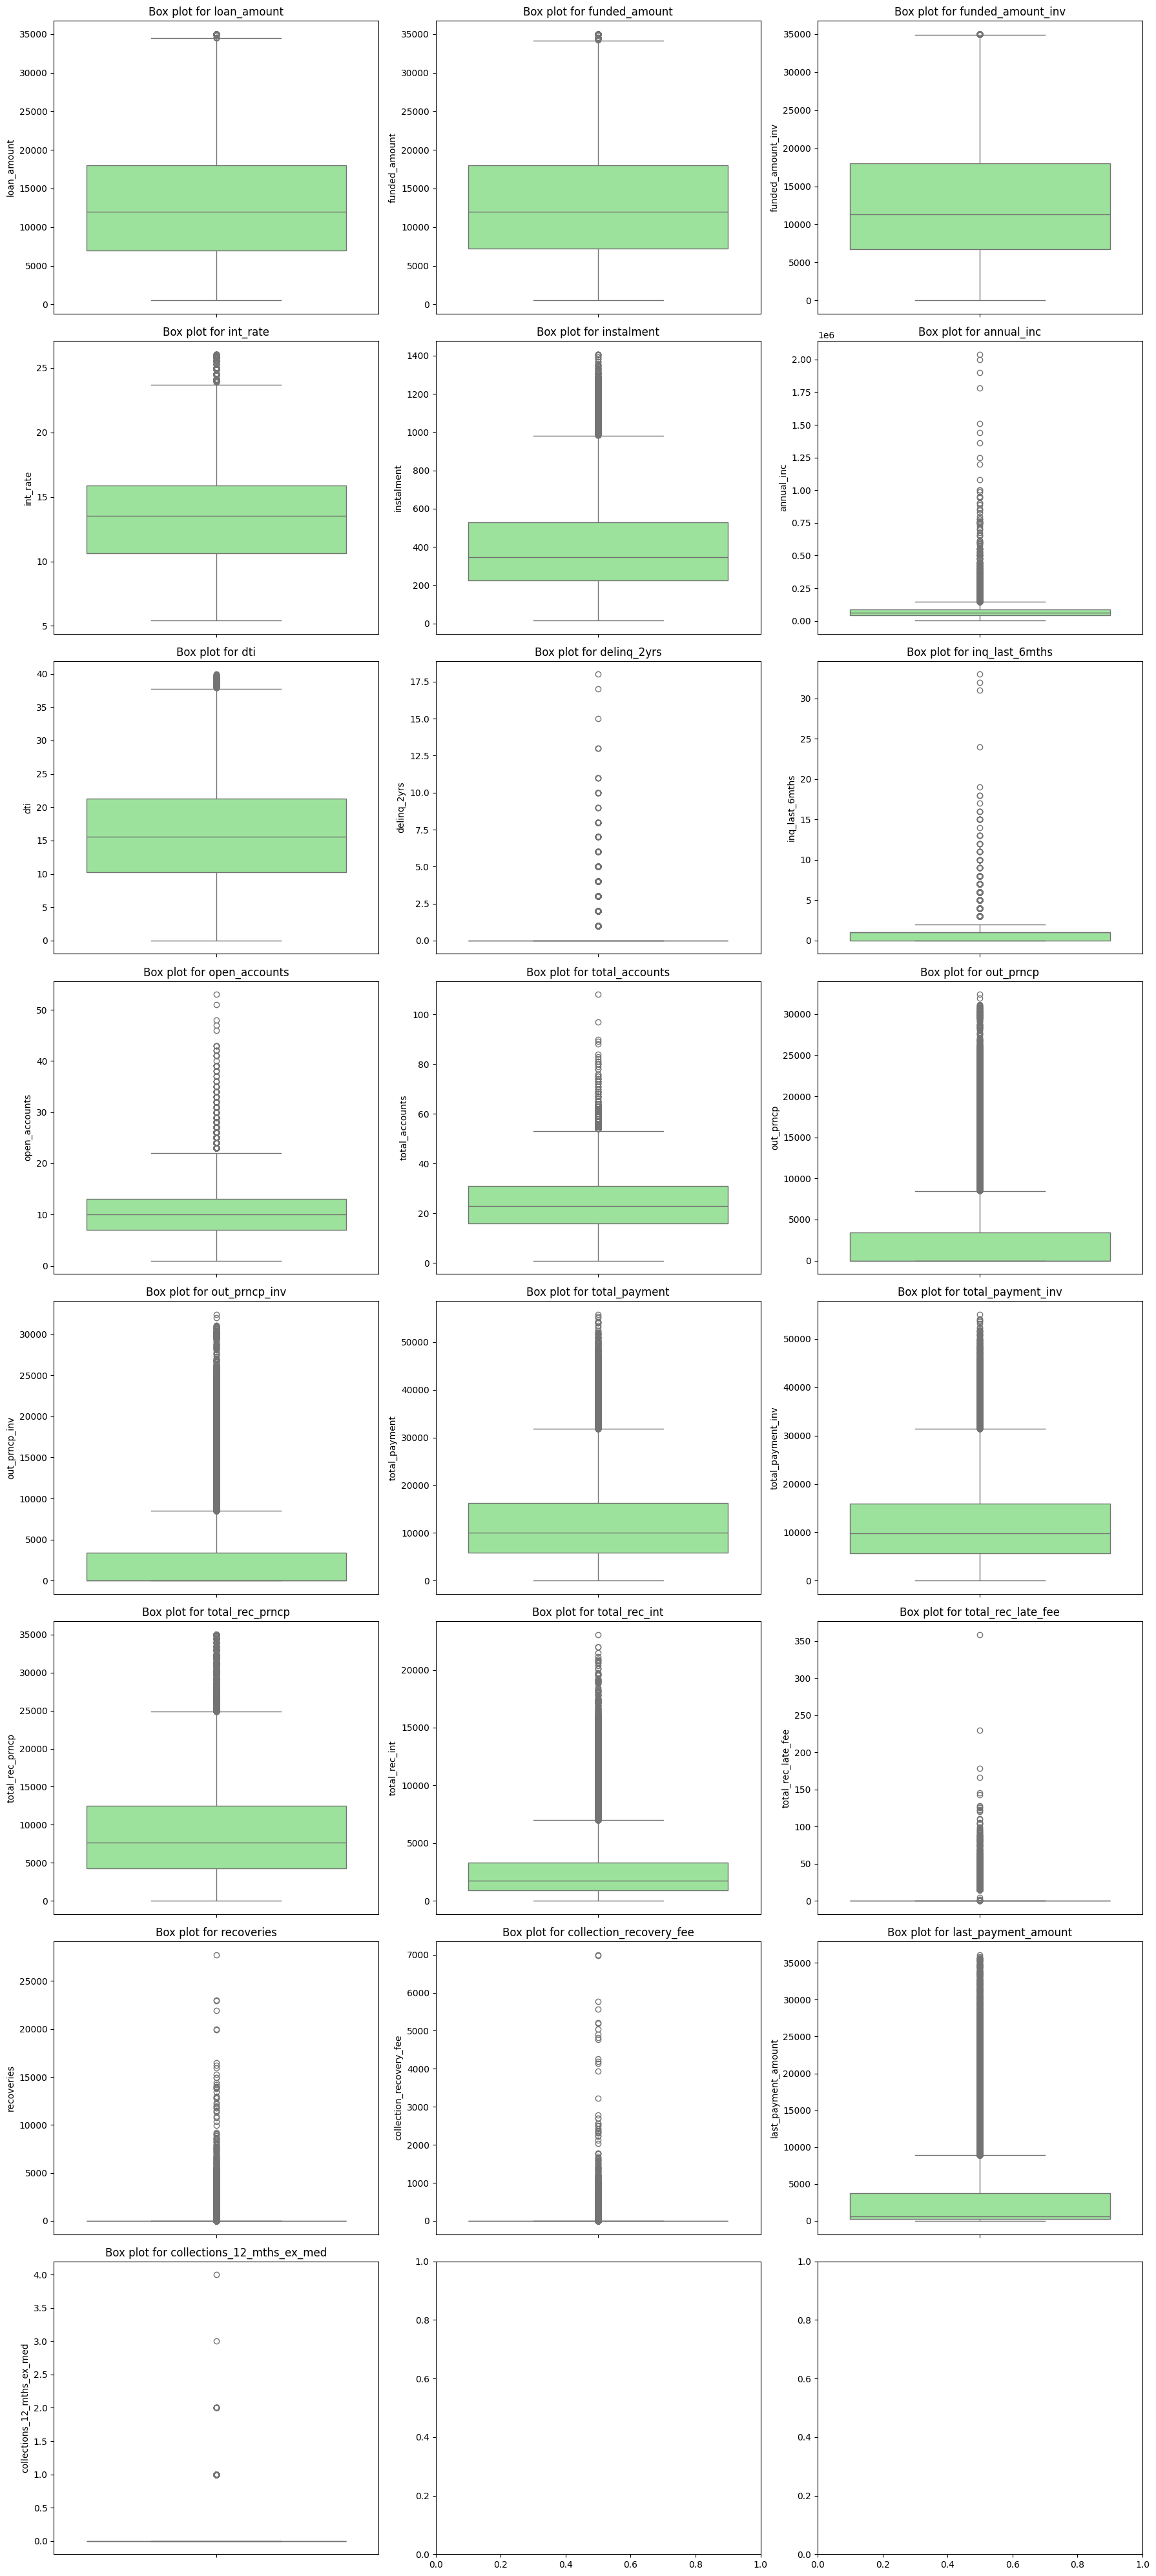

In [19]:
vis_analysis.view_outliers(cols=3)

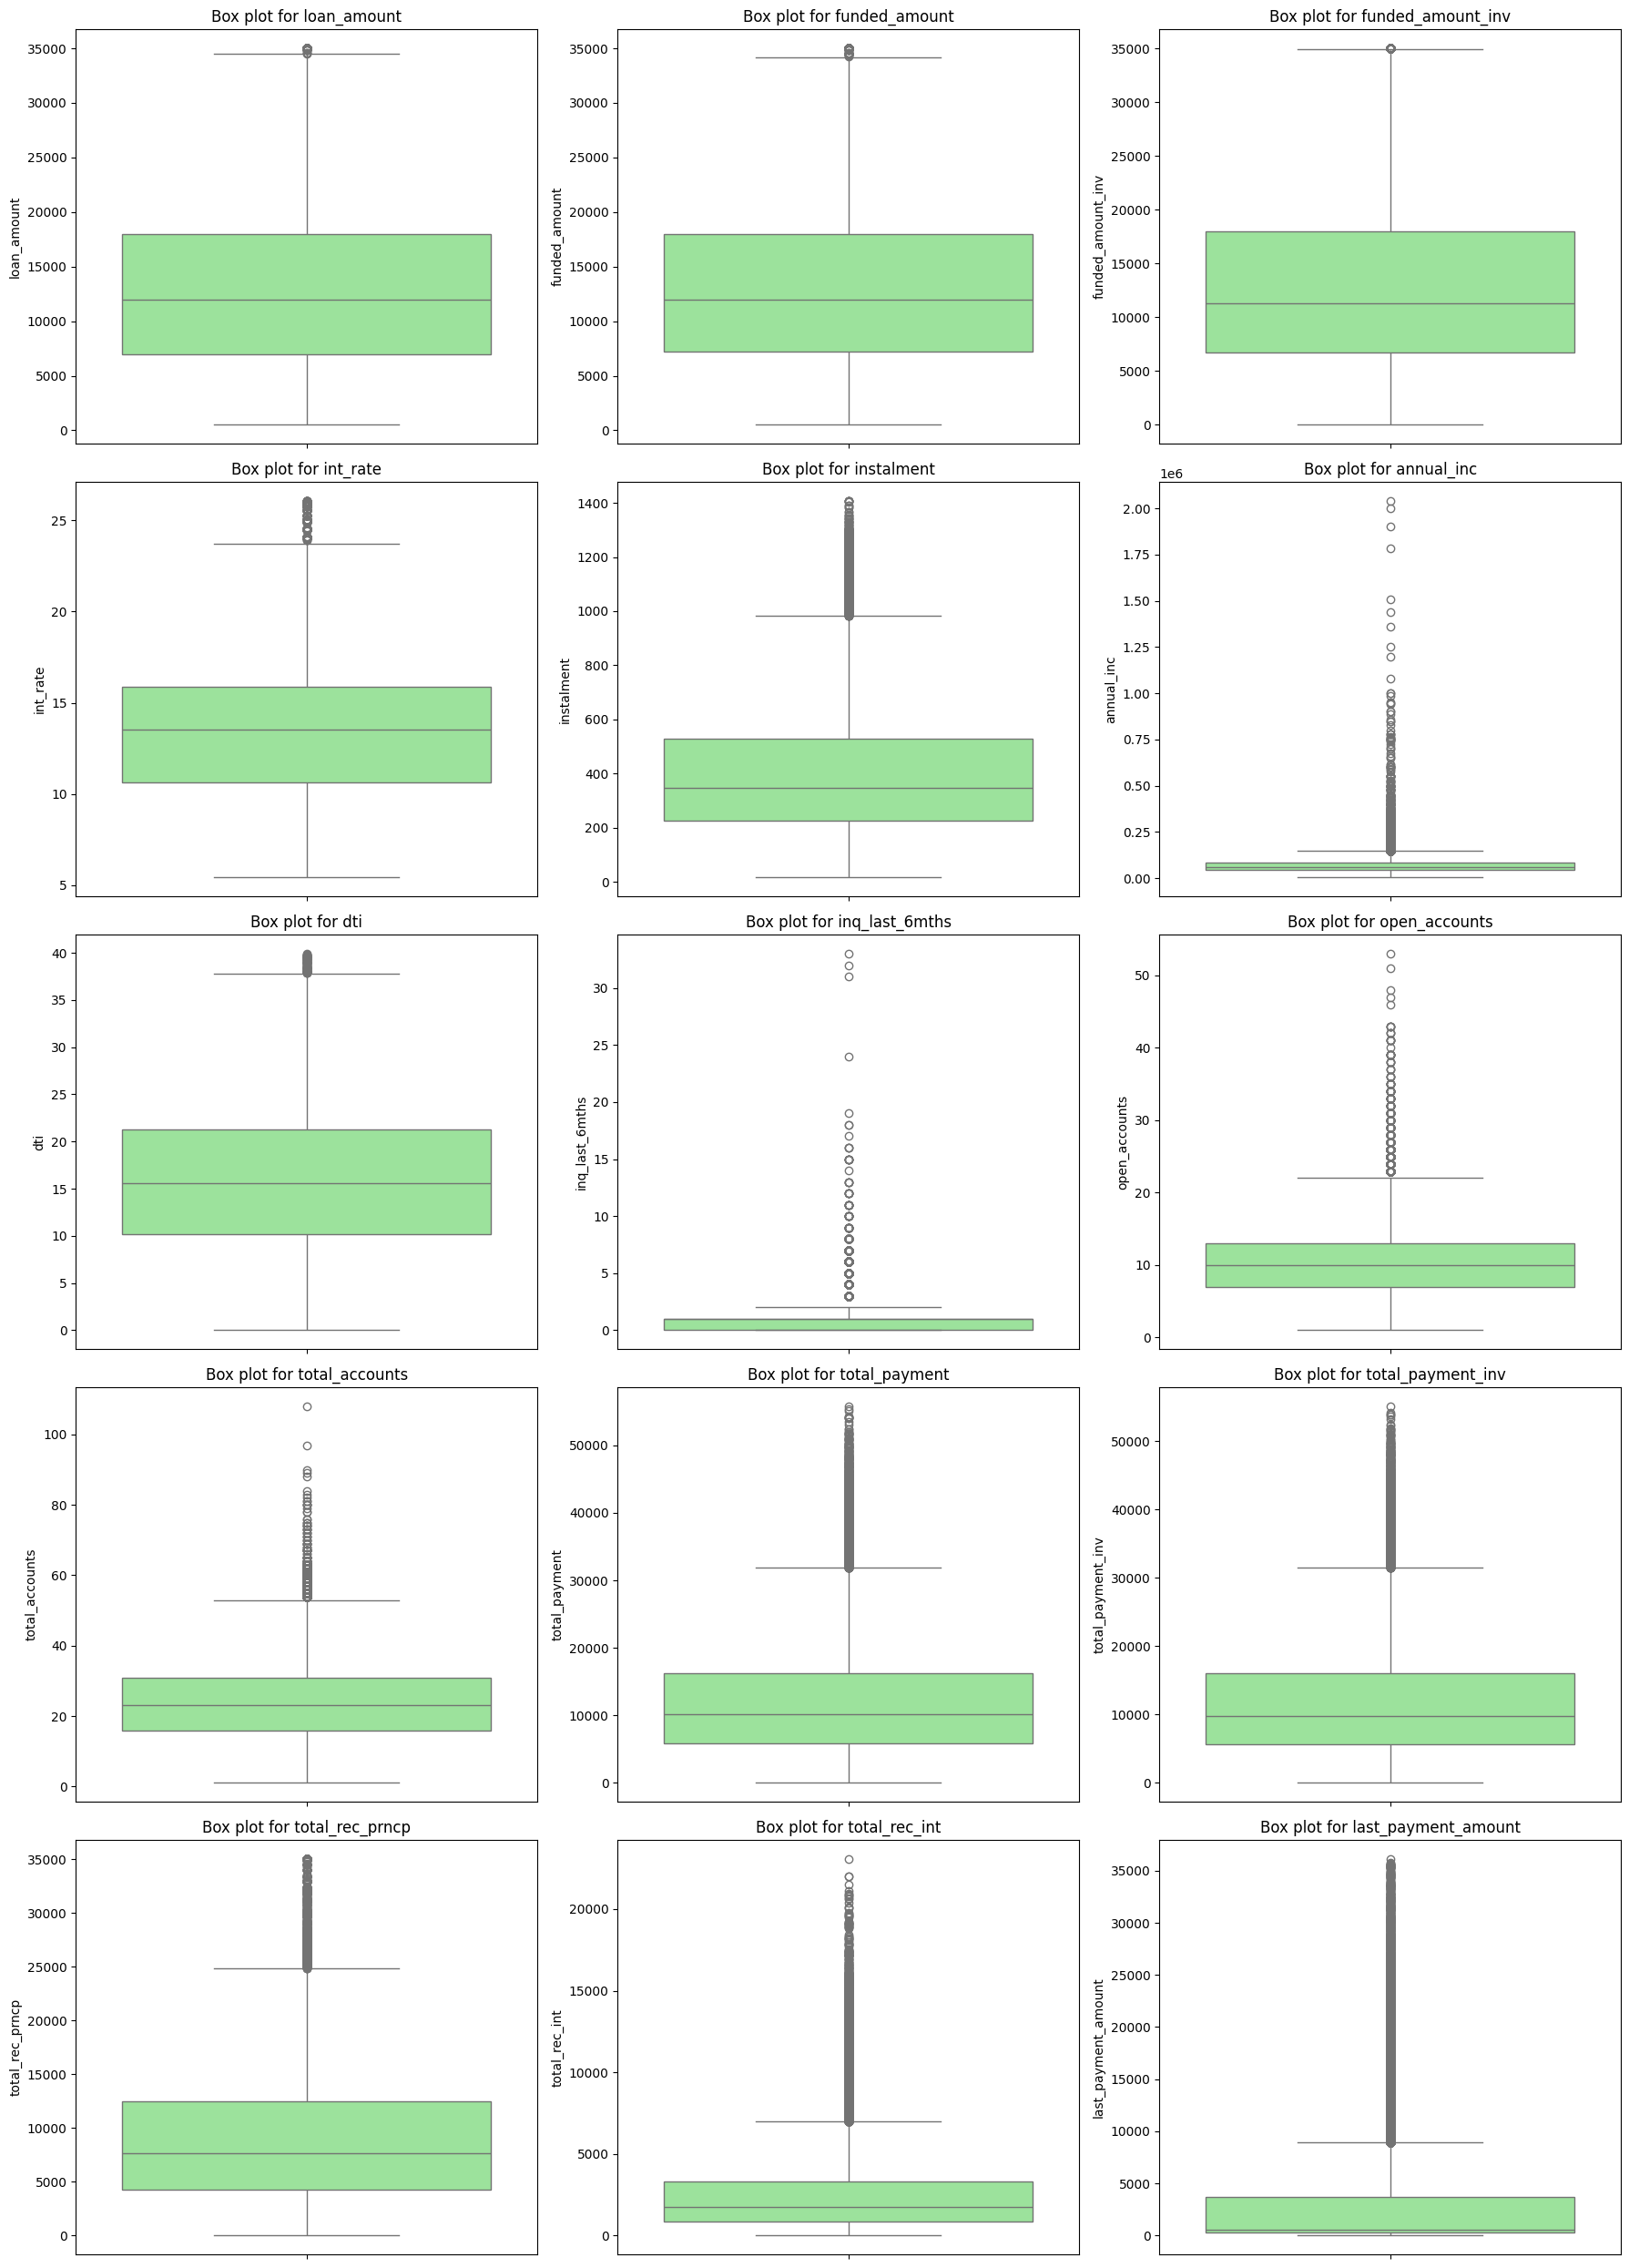

In [20]:
columns_with_outliers = [
    'loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate',
    'instalment', 'annual_inc', 'dti', 'inq_last_6mths',
    'open_accounts', 'total_accounts','total_payment', 
    'total_payment_inv', 'total_rec_prncp',
    'total_rec_int', 'last_payment_amount',
    ]

vis_analysis.view_outliers(columns=columns_with_outliers, cols=3)

In [21]:
outliers = DataFrameTransform(analysis_df)

In [22]:
outliers_df = outliers.remove_outliers(columns=columns_with_outliers, threshold=1.5)

In [23]:
outliers_df.shape

(33518, 39)

In [24]:
new_vis_analysis = Plotter(outliers_df)

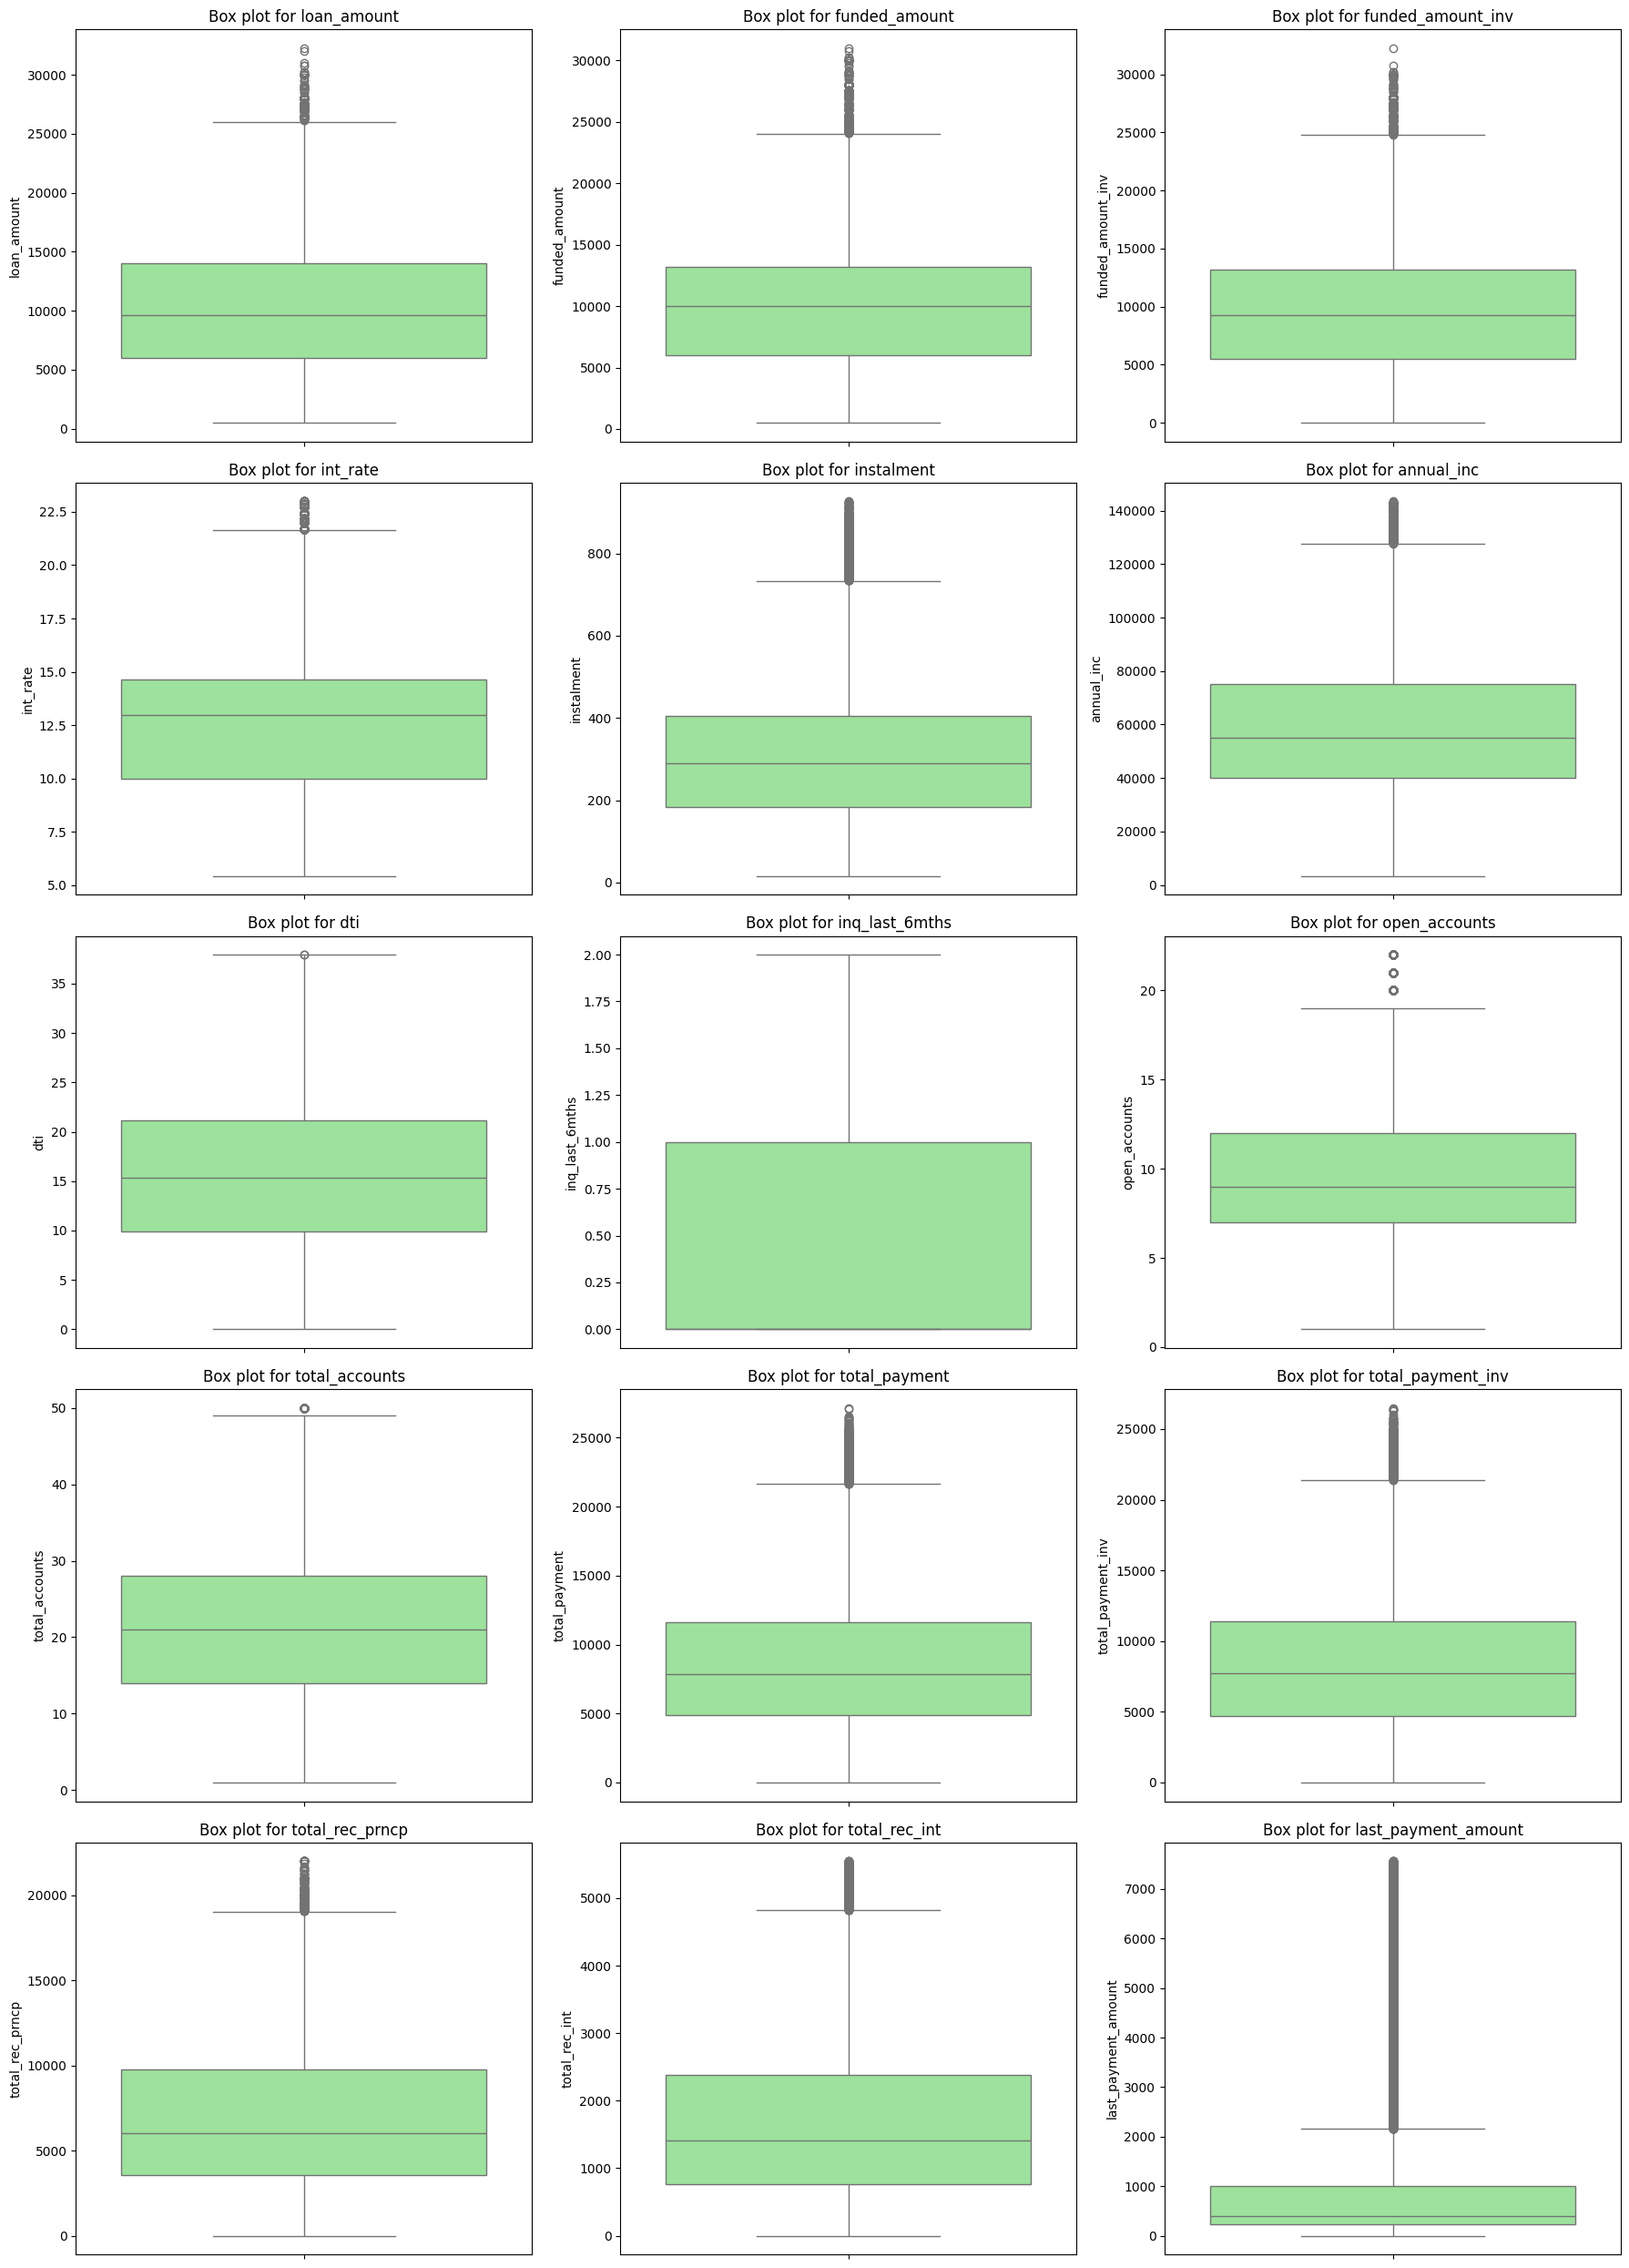

In [25]:
new_vis_analysis.view_outliers(columns=columns_with_outliers, cols=3)

In [29]:
analysis_df.shape

(54231, 39)

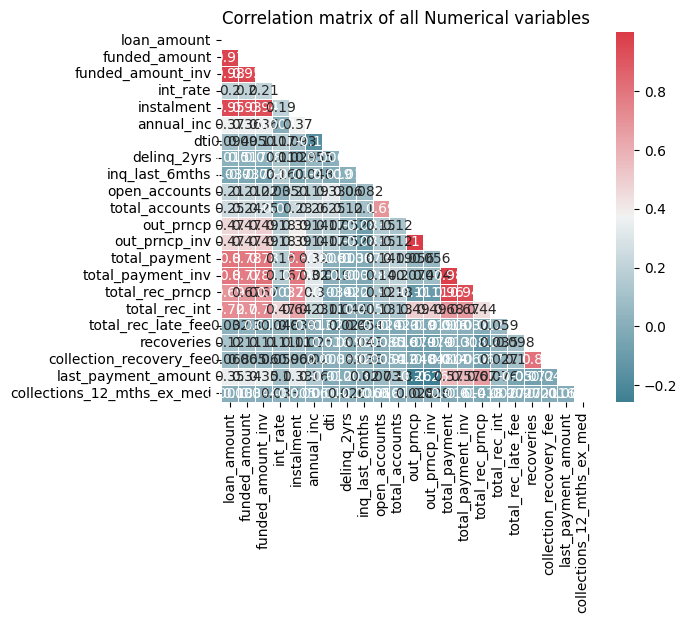

In [13]:
new_vis_analysis.view_correlation()

In [18]:
skew_analysis = Plotter(skewed_df)

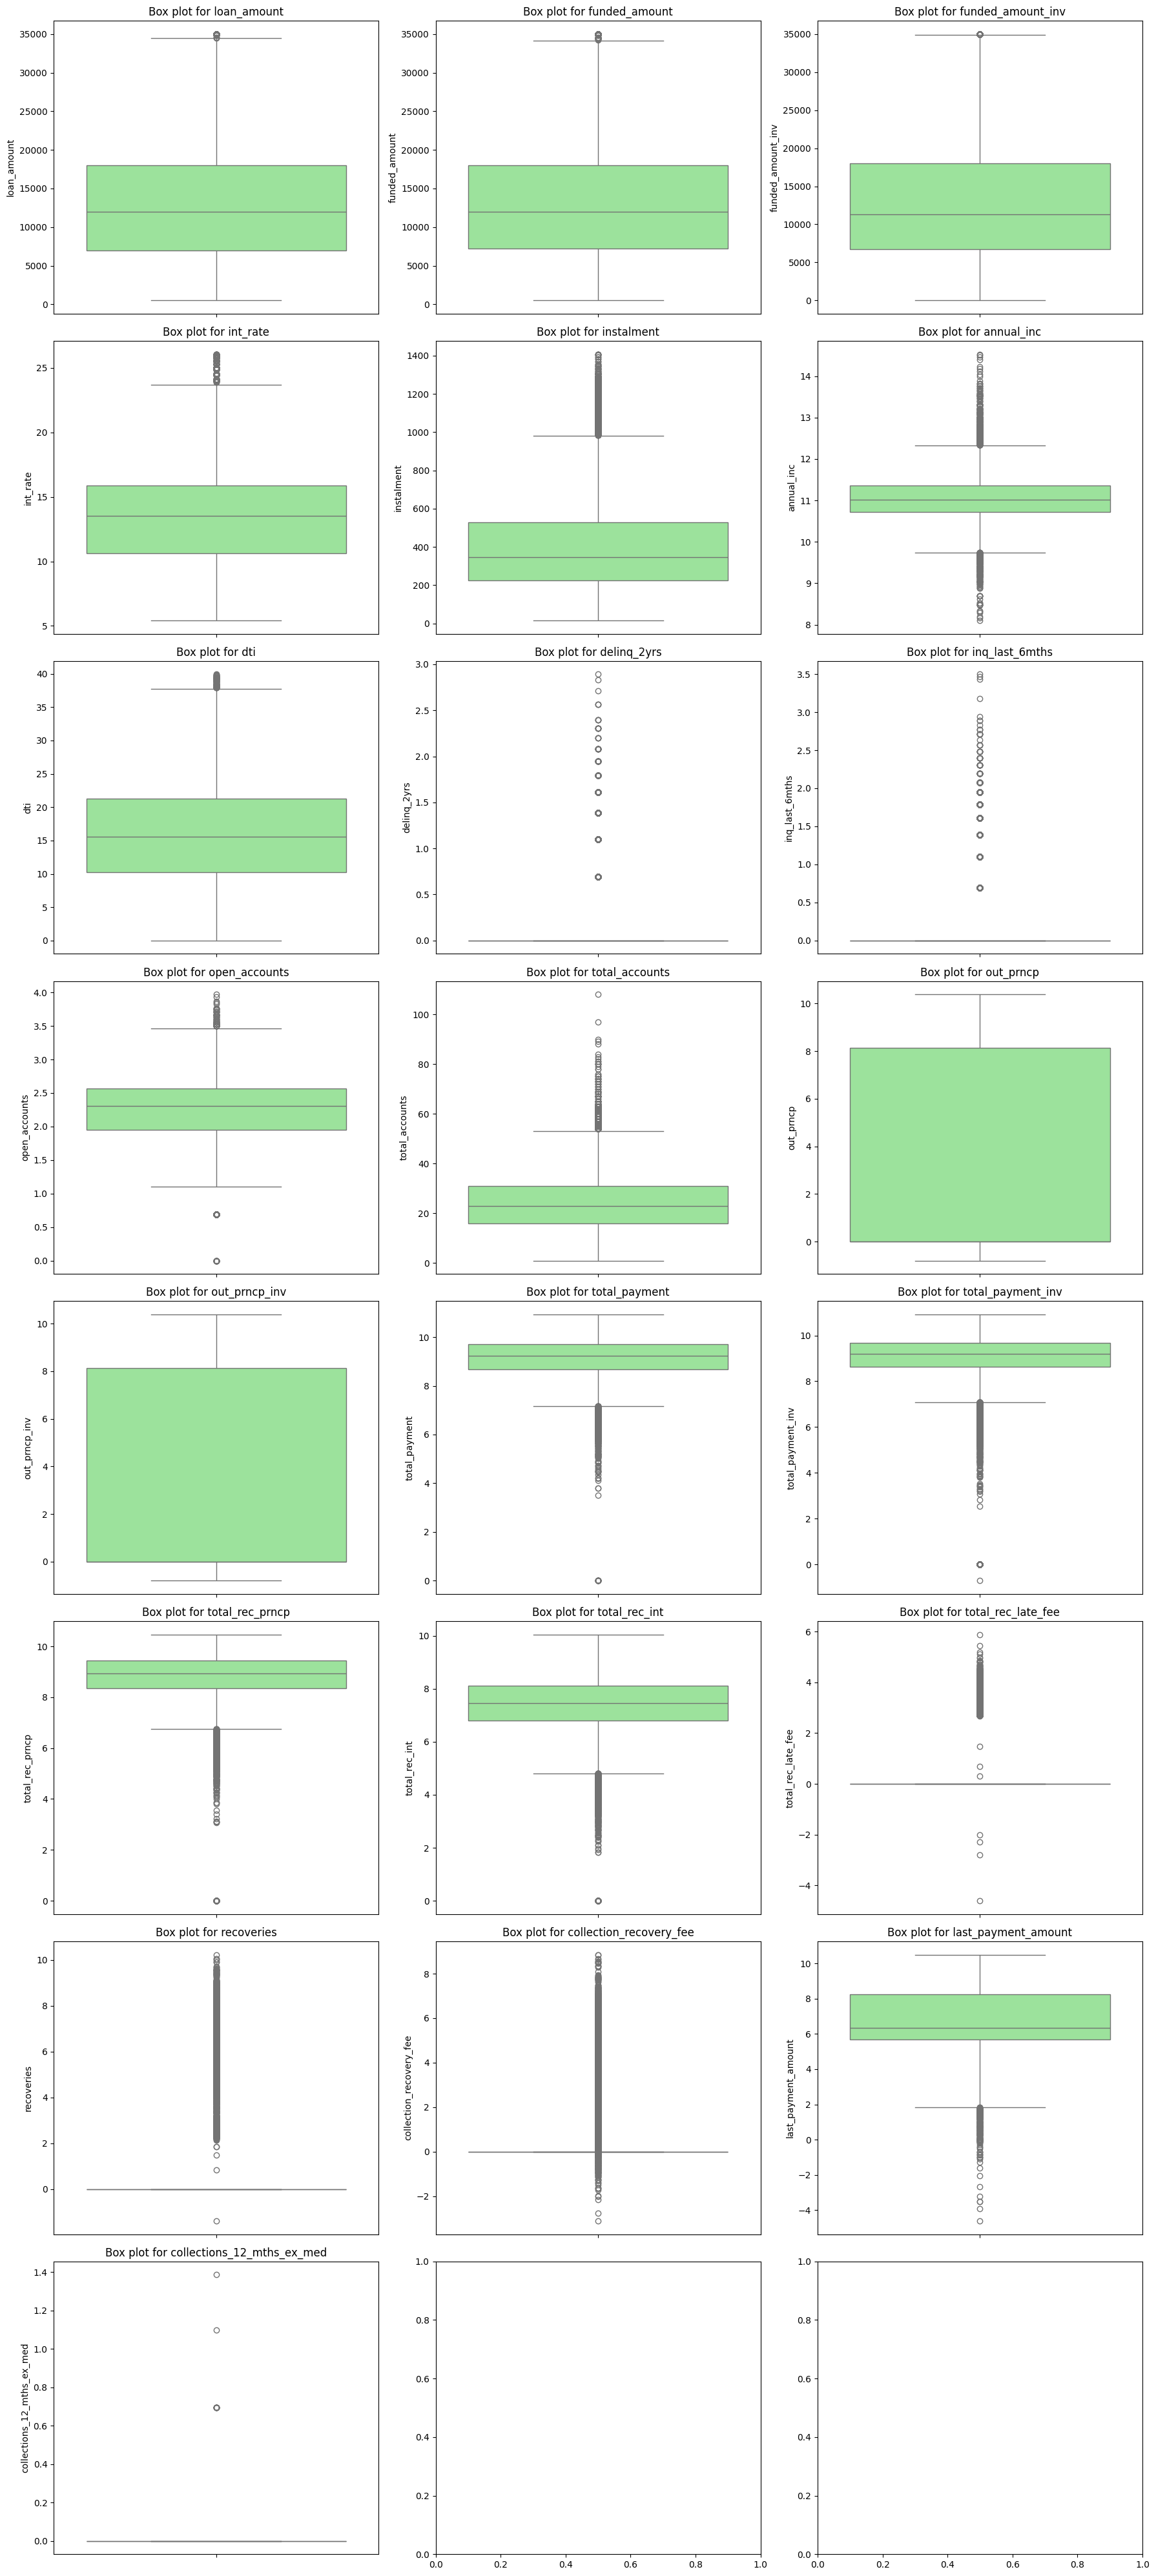

In [19]:
skew_analysis.view_outliers(cols=3)

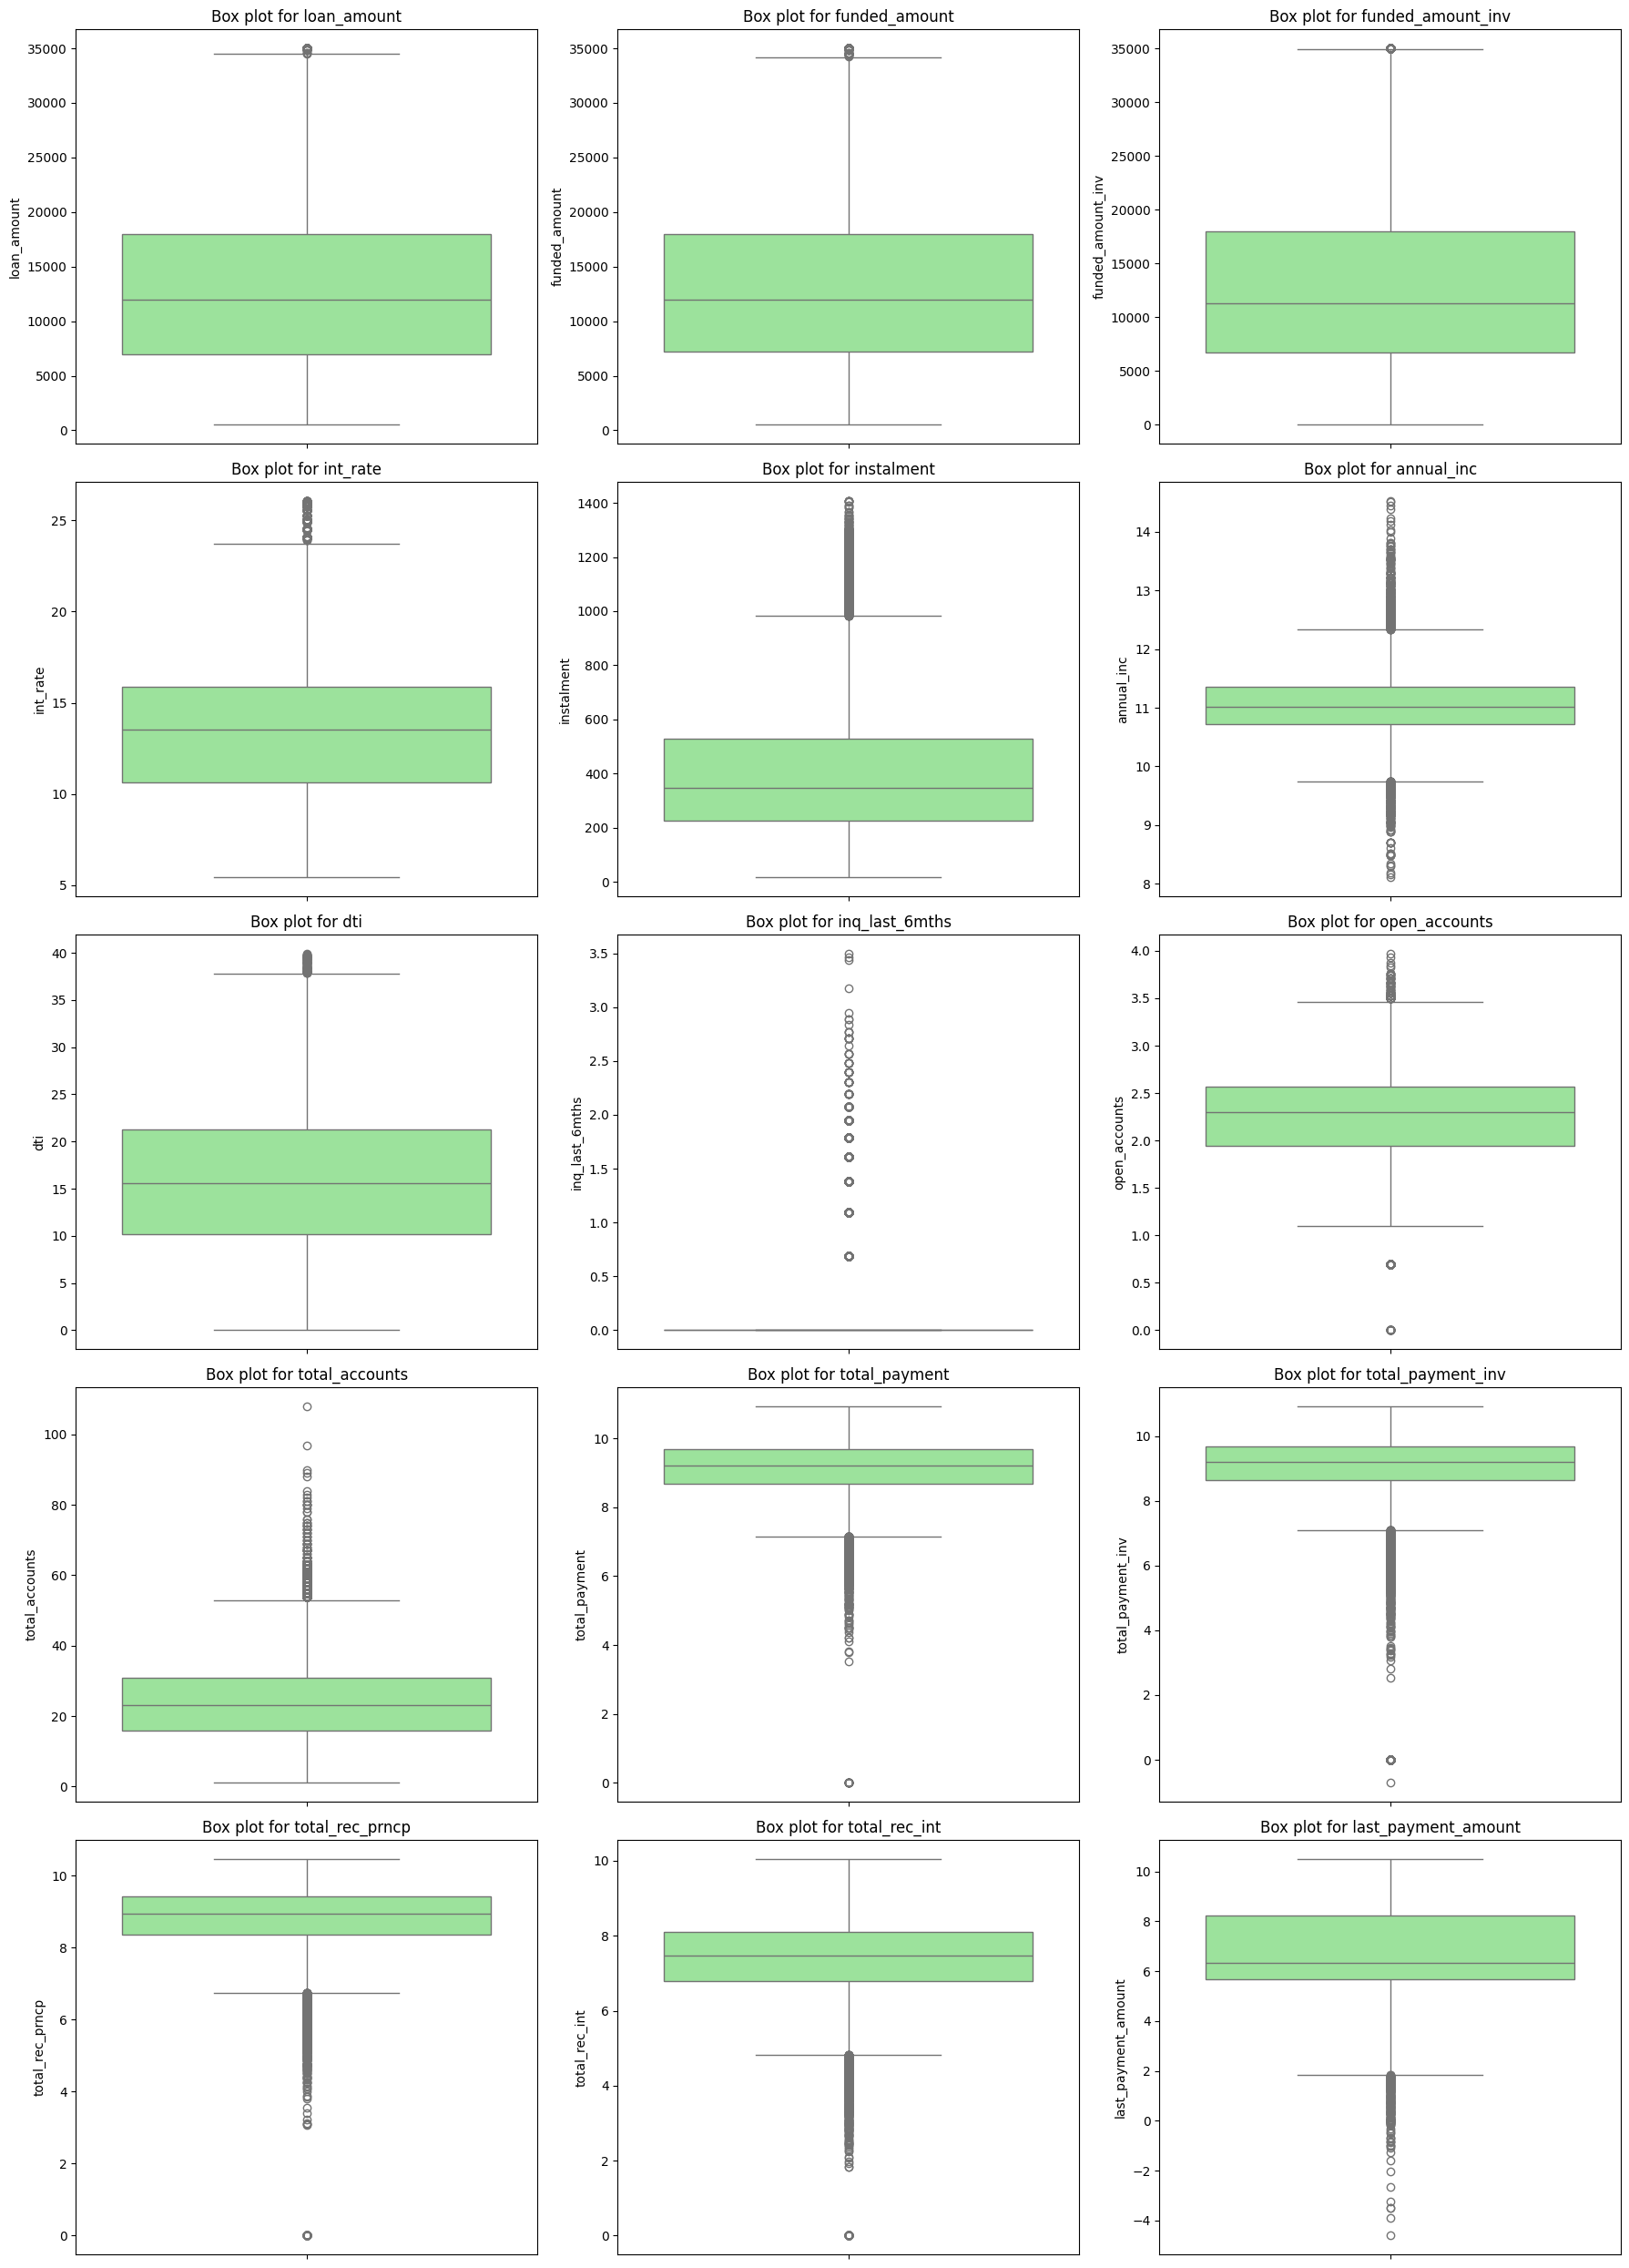

In [20]:
columns_with_outliers = [
    'loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate',
    'instalment', 'annual_inc', 'dti', 'inq_last_6mths',
    'open_accounts', 'total_accounts','total_payment', 
    'total_payment_inv', 'total_rec_prncp',
    'total_rec_int', 'last_payment_amount',
    ]

skew_analysis.view_outliers(columns=columns_with_outliers, cols=3)

In [21]:
outliers = DataFrameTransform(skewed_df)

In [22]:
outliers_df = outliers.remove_outliers(columns=columns_with_outliers, threshold=1.5)

In [23]:
outliers_df.shape

(35427, 39)

In [24]:
new_vis_analysis = Plotter(outliers_df)

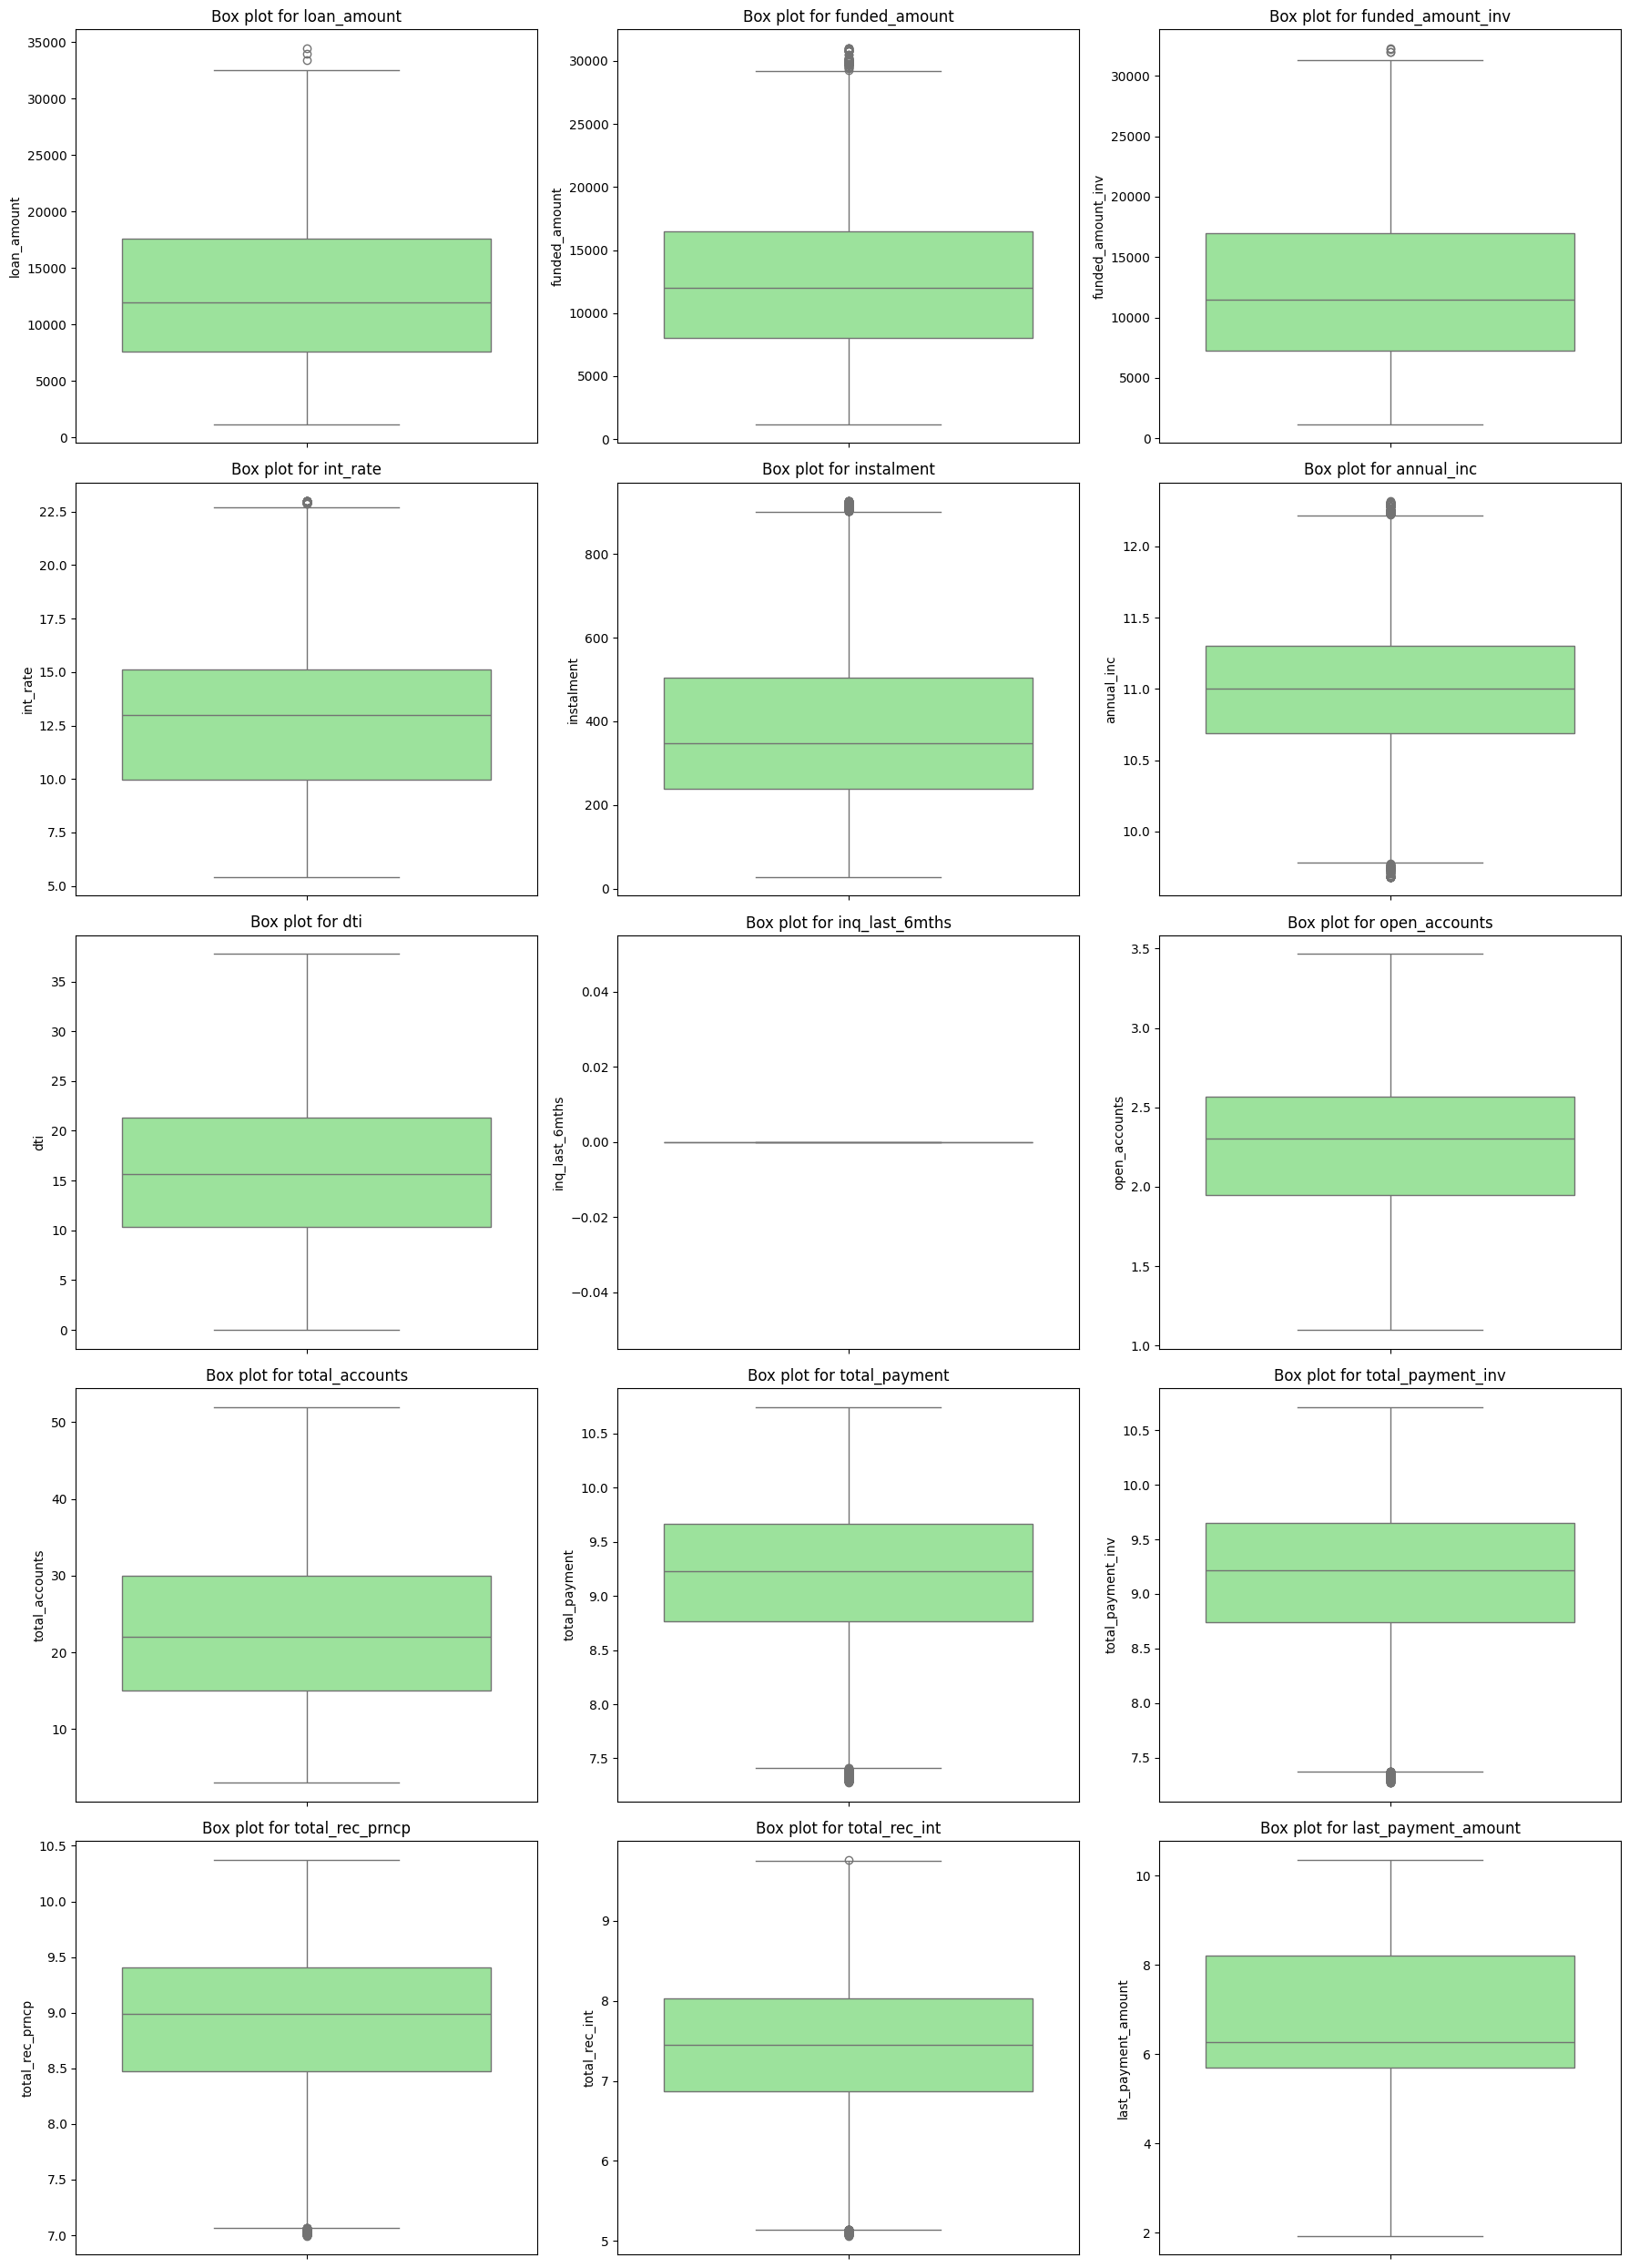

In [25]:
new_vis_analysis.view_outliers(columns=columns_with_outliers, cols=3)

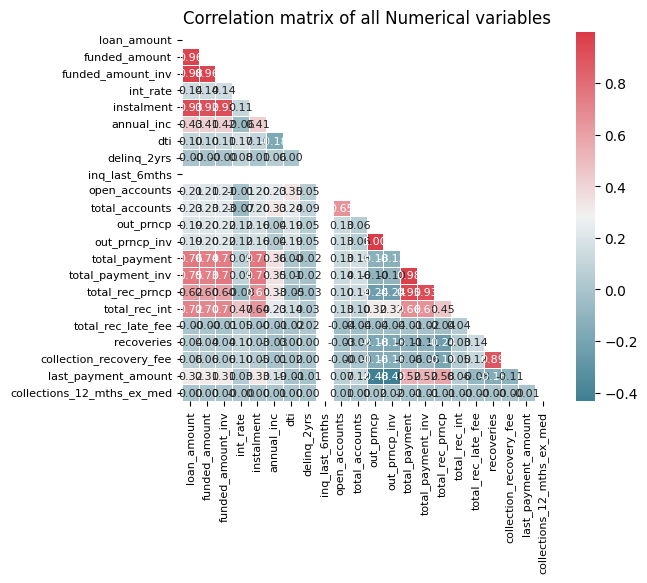

In [26]:
new_vis_analysis.view_correlation()

In [ ]:
#from this keep loan_amount so remove funded_amount and funded_amount_inv and instalment 
#from this keep out_prncp so remove out_prncp_inv
#from this keep total_payment so remove total_payment_inv and total_rec_prncp
#So remove 6 columns 'funded_amount', 'funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp'

In [27]:
correlated = DataFrameTransform(outliers_df)

In [33]:
highly_correlated = ['funded_amount', 'funded_amount_inv', 'instalment', 'out_prncp_inv', 'total_payment_inv', 'total_rec_prncp', 'collection_recovery_fee']
correlate_df = correlated.remove_high_correlation_columns(highly_correlated)

In [34]:
visual_correlation = Plotter(correlate_df)

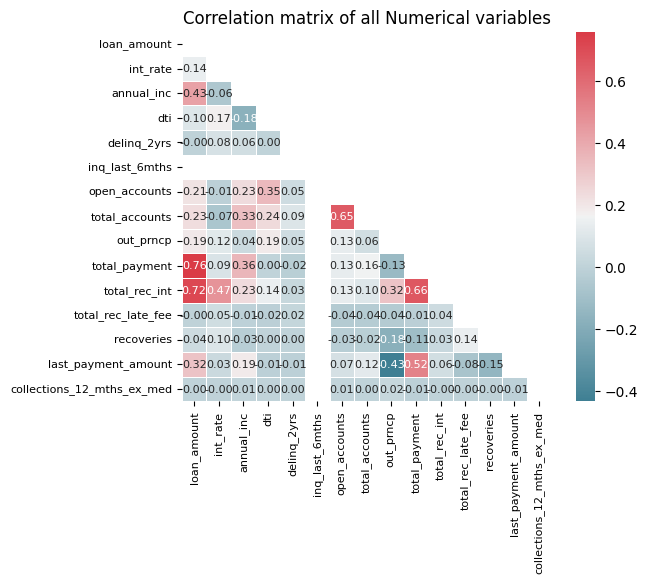

In [35]:
visual_correlation.view_correlation()